# Idea_Number_1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#---------------------------------------------------------
def to_prob(vector):
    output = np.copy(vector)
    for i in range(vector.size):
        if(output[i]<0):
            output[i] = 0
        if(output[i]>1):
            output[i] = 1
    return output
#--------------------------------------------------------- 
def to_color(i):
    B = 10
    q = int(i / (2 * B))
    r = i - 2 * B * q 
    if(r == 0): return 'bo'
    if(r == B): return 'ro'
#---------------------------------------------------------
def Round2(x):
    return int(np.round(x * 100))
#---------------------------------------------------------
def Round(x):
    return np.round(x * 1000) / 1000
#---------------------------------------------------------
global eps
eps = 1e-10

In [2]:
def FIGURE_02(aa, bb):
    plt.figure(figsize = (15, 15))
    for L in range(6):
        a = aa[L]
        b = bb[L]
        m = np.linspace(0, 1 - eps, 1001)
        p_attack_1 = (a - b - m) / (a - b + m)
        p_attack_2 = m / (a - b - m)
        p_attack_1 = to_prob(p_attack_1)
        p_attack_2 = to_prob(p_attack_2)
        p_attack_wrong = p_attack_1 + p_attack_2
        p_attack_right = 1 - (1 - p_attack_1) * (1 - p_attack_2)
        plt.subplot(3, 2, L + 1)
        plt.plot(m, p_attack_1, '--b', m, p_attack_2, '--r', m, p_attack_right, '--k')
        plt.grid()
        plt.xlabel('m')
        plt.ylabel('The Probability of Attack')
        plt.legend(['The Attack`s Probability of Pool 1', 
                    'The Attack`s Probability of Pool 2', 
                    'The Attack`s Probability'])
        title = ':   a = ' + str(Round(a)) + '  ,   b = ' + str(Round(b))
        plt.title('FIGURE_02' + title)

In [3]:
def FIGURE_03(aa, bb): 
    plt.figure(figsize = (15, 15))
    for L in range(6):
        a = aa[L]
        b = bb[L]
        m = np.linspace(0, 1 - eps, 1001)
        p_attack_1 = (a - b - m) / (a - b + m)
        p_attack_2 = m / (a - b - m)
        p_attack_1 = to_prob(p_attack_1)
        p_attack_2 = to_prob(p_attack_2)
        p_win_2 = (1 - p_attack_1) * p_attack_2
        p_win_1 = 1 - p_win_2
        plt.subplot(3, 2, L + 1)
        plt.plot(m, p_win_1, '--b', m, p_win_2, '--r')
        plt.grid()
        plt.xlabel('m')
        plt.ylabel('The Probability of Winning')
        plt.legend(['Pool 1', 'Pool 2'])
        title = ':   a = ' + str(Round(a)) + '  ,   b = ' + str(Round(b))
        plt.title('FIGURE_03' + title)

In [4]:
def FIGURE_04(aa, bb):  
    plt.figure(figsize = (15, 15))
    for L in range(6):
        a = aa[L]
        b = bb[L]
        m = np.linspace(0, 1 - eps, 1001)
        u_1 = a - m
        u_2 = (a * b + a * m - b ** 2 - m ** 2) / (a - b + m)
        welfare = u_1 + u_2
        plt.subplot(3, 2, L + 1)
        plt.plot(m, u_1, '--b', m, u_2, '--r', m, welfare, '--k')
        plt.grid()
        plt.xlabel('m')
        plt.ylabel('Utility')
        plt.legend(['The Utility of Pool 1', 'The Utility of pool 2', 'Social Welfare'])
        title = ':   a = ' + str(Round(a)) + '  ,   b = ' + str(Round(b))
        plt.title('FIGURE_04' + title)
        plt.ylim(-1.1, 1.1)

In [5]:
def FIGURE_05(aa, bb):    
    plt.figure(figsize = (15, 15))
    for L in range(6):
        a = aa[L]
        b = bb[L]
        d = np.linspace(0, 1 - eps, 1001)
        M = [0, 0.2, 0.5, 0.8, 1]
        for j in range(5):
            m = M[j]
            Q23 = (1 - d) ** 2 / 2
            Q2, Q3 = Q23, Q23
            Q14 = 0.5 - Q23
            Q1, Q4 = Q14, Q14
            U1 = a - m
            U2 = a
            U3 = b
            U4 = (a * b + a * m - b ** 2 - m ** 2) / (a - b + m)
            a11 = Q1 * U1 + Q2 * U2 + Q3 * U3 + Q4 * U4
            welfare = 2 * a11
            if(j == 0): string = '--b'
            if(j == 1): string = '--r'
            if(j == 2): string = '--g'
            if(j == 3): string = '--m'
            if(j == 4): string = '--k'
            plt.subplot(3, 2, L + 1)
            plt.plot(d, welfare, string)
            plt.grid()
            plt.legend(['m = 0', 'm = 0.2', 'm = 0.5', 'm = 0.8', 'm = 1'])
            plt.xlabel('d')
            plt.ylabel('Social Welfare')
            title = ':   a = ' + str(Round(a)) + '  ,   b = ' + str(Round(b))
            plt.title('FIGURE_05' + title)
            plt.ylim(-1.1, 1.1)

In [6]:
def FIGURE_07(aa, bb):
    plt.figure(figsize = (15, 15))
    for L in range(6):
        a = aa[L]
        b = bb[L]
        m, d = 0.2, 0.2
        Q23 = (1 - d) ** 2 / 2
        Q2, Q3 = Q23, Q23
        Q14 = 0.5 - Q23
        Q1, Q4 = Q14, Q14
        U1 = a - m
        U2 = a
        U3 = b
        U4 = (a * b + a * m - b ** 2 - m ** 2) / (a - b + m)
        a11 = Q1 * U1 + Q2 * U2 + Q3 * U3 + Q4 * U4
        a21 = (1 - d) * b + d * (a - m)
        a12 = (1 - d) * a + d * (b + m)
        a22 = 0.5
        A = np.array([[a11, a12],[a21, a22]])
        h = 0.01
        t = np.arange(0, 40, h)
        if(L == 4): t = np.arange(0, 100, h)
        if(L == 5): t = np.arange(0, 200, h)
        n = t.size
        I = np.eye(2)
        e0 = I[0].reshape(2, 1)
        e1 = I[1].reshape(2, 1)
        INITIAL = np.array([[0.9, 0.1],
                            [0.7, 0.3],
                            [0.5, 0.5],
                            [0.3, 0.7],
                            [0.1, 0.9]])
        for j in range(5):
            initial = INITIAL[j]
            p = np.zeros((2, n))
            p[:, 0] = np.array(initial)
            for i in range(n - 1):
                q = p[:, i].reshape(2, 1)
                p[0, i + 1] = q[0] + h * q[0] * (e0.T - q.T) @ A @ q  
                p[1, i + 1] = q[1] + h * q[1] * (e1.T - q.T) @ A @ q
            if(j == 0): string = '--b'
            if(j == 1): string = '--r'
            if(j == 2): string = '--k'
            if(j == 3): string = '--g'
            if(j == 4): string = '--m'
            plt.subplot(3, 2, L + 1)
            plt.plot(t, p[0, :], string)
            plt.grid()
            plt.legend(['x1(0) = 0.9', 'x1(0) = 0.7', 'x1(0) = 0.5', 'x1(0) = 0.3', 'x1(0) = 0.1'])
            plt.xlabel('Time t')
            plt.ylabel('The Frequency of Open Strategy')
            title = ':   a = ' + str(Round(a)) + '  ,   b = ' + str(Round(b))
            plt.title('FIGURE_07' + title)
            plt.ylim(-0.1, 1.1)

In [7]:
def FIGURE_09(aa, bb):
    plt.figure(figsize = (15, 15))
    for L in range(6):
        a = aa[L]
        b = bb[L]
        m, d = 0.2, 0.8
        Q23 = (1 - d) ** 2 / 2
        Q2, Q3 = Q23, Q23
        Q14 = 0.5 - Q23
        Q1, Q4 = Q14, Q14
        U1 = a - m
        U2 = a
        U3 = b
        U4 = (a * b + a * m - b ** 2 - m ** 2) / (a - b + m)
        a11 = Q1 * U1 + Q2 * U2 + Q3 * U3 + Q4 * U4
        a21 = (1 - d) * b + d * (a - m)
        a12 = (1 - d) * a + d * (b + m)
        a22 = 0.5
        A = np.array([[a11, a12],[a21, a22]])
        h = 0.01
        t = np.arange(0, 400, h)
        if(L == 0 or L ==1 or L == 5): t = np.arange(0, 100, h)
        n = t.size
        I = np.eye(2)
        e0 = I[0].reshape(2, 1)
        e1 = I[1].reshape(2, 1)
        INITIAL = np.array([[0.9, 0.1],
                            [0.7, 0.3],
                            [0.5, 0.5],
                            [0.3, 0.7],
                            [0.1, 0.9]])
        for j in range(5):
            initial = INITIAL[j]
            p = np.zeros((2, n))
            p[:, 0] = np.array(initial)
            for i in range(n - 1):
                q = p[:, i].reshape(2, 1)
                p[0, i + 1] = q[0] + h * q[0] * (e0.T - q.T) @ A @ q  
                p[1, i + 1] = q[1] + h * q[1] * (e1.T - q.T) @ A @ q
            if(j == 0): string = '--m'
            if(j == 1): string = '--g'
            if(j == 2): string = '--k'
            if(j == 3): string = '--r'
            if(j == 4): string = '--b'
            plt.subplot(3, 2, L + 1)
            plt.plot(t, p[0, :], string)
            plt.grid()
            plt.legend(['x1(0) = 0.9', 'x1(0) = 0.7', 'x1(0) = 0.5', 'x1(0) = 0.3', 'x1(0) = 0.1'])
            plt.xlabel('Time t')
            plt.ylabel('The Frequency of Open Strategy')
            title = ':   a = ' + str(Round(a)) + '  ,   b = ' + str(Round(b))
            plt.title('FIGURE_09' + title)
            plt.ylim(-0.1, 1.1)

In [8]:
def FIGURE_10(aa, bb):
    plt.figure(figsize = (15, 15))
    for L in range(6):
        a = aa[L]
        b = bb[L]
        m = np.linspace(eps, 1 - eps, 1001)   
        D = [0.4, 0.6, 0.8]
        for j in range(3):
            d = D[j]    
            Q23 = (1 - d) ** 2 / 2
            Q2, Q3 = Q23, Q23
            Q14 = 0.5 - Q23
            Q1, Q4 = Q14, Q14
            U1 = a - m
            U2 = a
            U3 = b
            U4 = (a * b + a * m - b ** 2 - m ** 2) / (a - b + m)
            a11 = Q1 * U1 + Q2 * U2 + Q3 * U3 + Q4 * U4
            a21 = (1 - d) * b + d * (a - m)
            a12 = (1 - d) * a + d * (b + m)
            a22 = 0.5
            p_open = (a22 - a12) / (a11 - a12 + a22 - a21)
            p_open = to_prob(p_open)
            if(j == 0): string = '--k'
            if(j == 1): string = '--r'
            if(j == 2): string = '--b'
            plt.subplot(3, 2, L + 1)
            plt.plot(m, p_open, string)
            plt.grid()
            plt.legend(['d = 0.4', 'd = 0.6', 'd = 0.8'])
            plt.xlabel('m')
            plt.ylabel('The Frequency of Open Strategy')
            title = ':   a = ' + str(Round(a)) + '  ,   b = ' + str(Round(b))
            plt.title('FIGURE_10' + title)
            plt.ylim(-0.1, 1.1)

In [9]:
def FIGURE_11(aa, bb):
    plt.figure(figsize = (15, 15))
    for L in range(6):
        a = aa[L]
        b = bb[L]
        d = np.linspace(eps, 1 - eps, 1001)   
        M = [0.2, 0.5, 0.8]
        for j in range(3):
            m = M[j]    
            Q23 = (1 - d) ** 2 / 2
            Q2, Q3 = Q23, Q23
            Q14 = 0.5 - Q23
            Q1, Q4 = Q14, Q14
            U1 = a - m
            U2 = a
            U3 = b
            U4 = (a * b + a * m - b ** 2 - m ** 2) / (a - b + m)
            a11 = Q1 * U1 + Q2 * U2 + Q3 * U3 + Q4 * U4
            a21 = (1 - d) * b + d * (a - m)
            a12 = (1 - d) * a + d * (b + m)
            a22 = 0.5
            p_open = (a22 - a12) / (a11 - a12 + a22 - a21)
            p_open = to_prob(p_open)
            if(j == 0): string = '--b'
            if(j == 1): string = '--r'
            if(j == 2): string = '--k'
            plt.subplot(3, 2, L + 1)
            plt.plot(d, p_open, string)
            plt.grid()
            plt.legend(['m = 0.2', 'm = 0.5', 'm = 0.8'])
            plt.xlabel('d')
            plt.ylabel('The Frequency of Open Strategy')
            title = ':   a = ' + str(Round(a)) + '  ,   b = ' + str(Round(b))
            plt.title('FIGURE_11' + title)
            plt.ylim(-0.1, 1.1)

In [3]:
def DOMAIN(aa, bb):
    size = 500
    T = np.linspace(eps, 1 - eps, size + 1)
    plt.figure(figsize = (20, 30))
    for L in range(6):
        a = aa[L]
        b = bb[L]
        Only_OO_m, Only_OO_d = [], []
        Only_CC_m, Only_CC_d = [], []
        Both_m,       Both_d = [], []
        Nothing_m, Nothing_d = [], []

        for m in T:
            for d in T:
                u_1 = a - m
                u_2 = (a * b + a * m - b ** 2 - m ** 2) / (a - b + m)
                OO = (d - 0.5 * d ** 2) * (u_1 + u_2) + 0.5 * (1 - d) ** 2
                OC = d * (b + m) + (1 - d) * a
                CO = d * (a - m) + (1 - d) * b
                CC = 0.5
                if(OO > CO and CC < OC):
                    Only_OO_m.append(m)
                    Only_OO_d.append(d)
                elif(CC > OC and OO < CO):
                    Only_CC_m.append(m)
                    Only_CC_d.append(d)
                elif(OO > CO and CC > OC):
                    Both_m.append(m)
                    Both_d.append(d)
                elif(CC < OC and OO < CO):
                    Nothing_m.append(m)
                    Nothing_d.append(d)

        s = 0.1
        plt.subplot(6, 2, index(L))
        #plt.figure(figsize = (5, 5))
        plt.scatter(Only_OO_m, Only_OO_d, s = s, c = 'green'  )
        plt.scatter(Only_CC_m, Only_CC_d, s = s, c = 'magenta')
        plt.scatter(Nothing_m, Nothing_d, s = s, c = 'yellow' )
        plt.scatter(   Both_m,    Both_d, s = s, c = 'purple' )
        plt.axis('square');
        plt.axis([-0.1, 1.1, -0.1, 1.1])
        plt.grid()
        plt.xlabel('m')
        plt.ylabel('d')
        k = 1
        n_Only_OO_m = Round2(k * len(Only_OO_m) / size ** 2)
        n_Only_CC_m = Round2(k * len(Only_CC_m) / size ** 2)
        n_Both_m    = Round2(k * len(   Both_m) / size ** 2)
        n_Nothing_m = 100 - n_Only_OO_m - n_Only_CC_m - n_Both_m
        q0 = 'a = ' + str(Round(a)) + '  ,   b = ' + str(Round(b)) + '\n'
        q1 = '(O, O) : ' + str(n_Only_OO_m) + '%\n'
        q2 = '(C, C) : ' + str(n_Only_CC_m) + '%\n'
        q3 = ' mixed : ' + str(n_Nothing_m) + '%'
        
        q = q0 + q1 + q2 + q3
        plt.title(q)

def index(L):
    if(L == 0): return 1
    if(L == 1): return 2
    if(L == 2): return 5
    if(L == 3): return 6
    if(L == 4): return 9
    if(L == 5): return 10

In [6]:
aa = np.array([0.520, 0.515, 0.510, 0.505, 0.5025, 0.500])
bb = 1 - aa

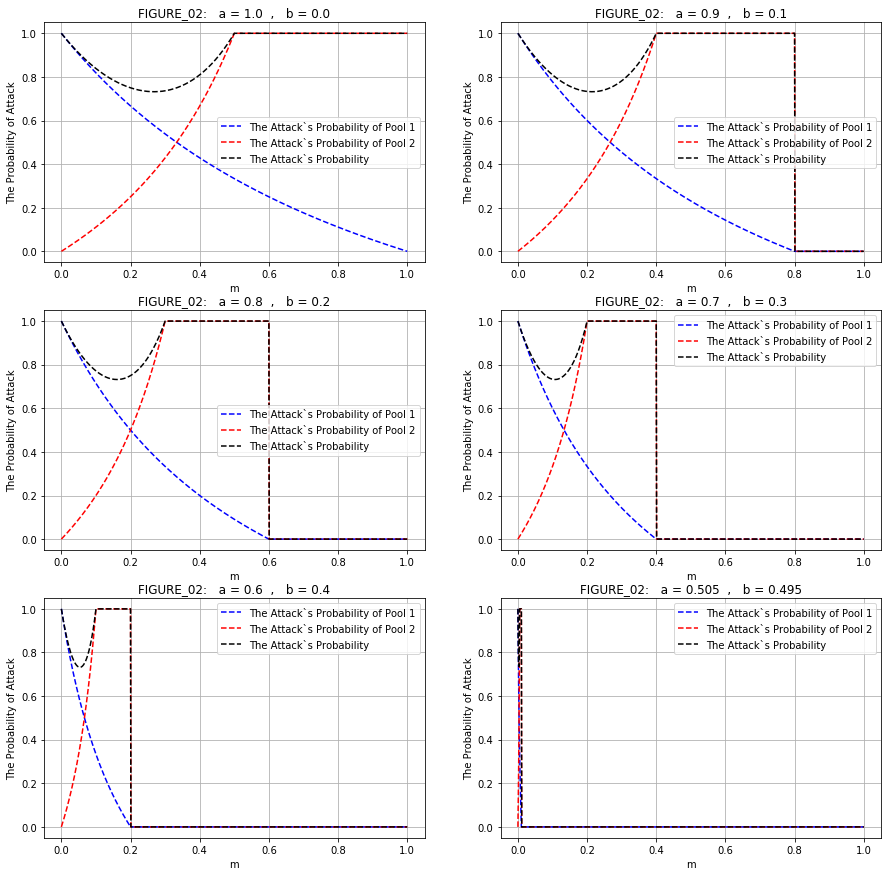

In [12]:
FIGURE_02(aa, bb)

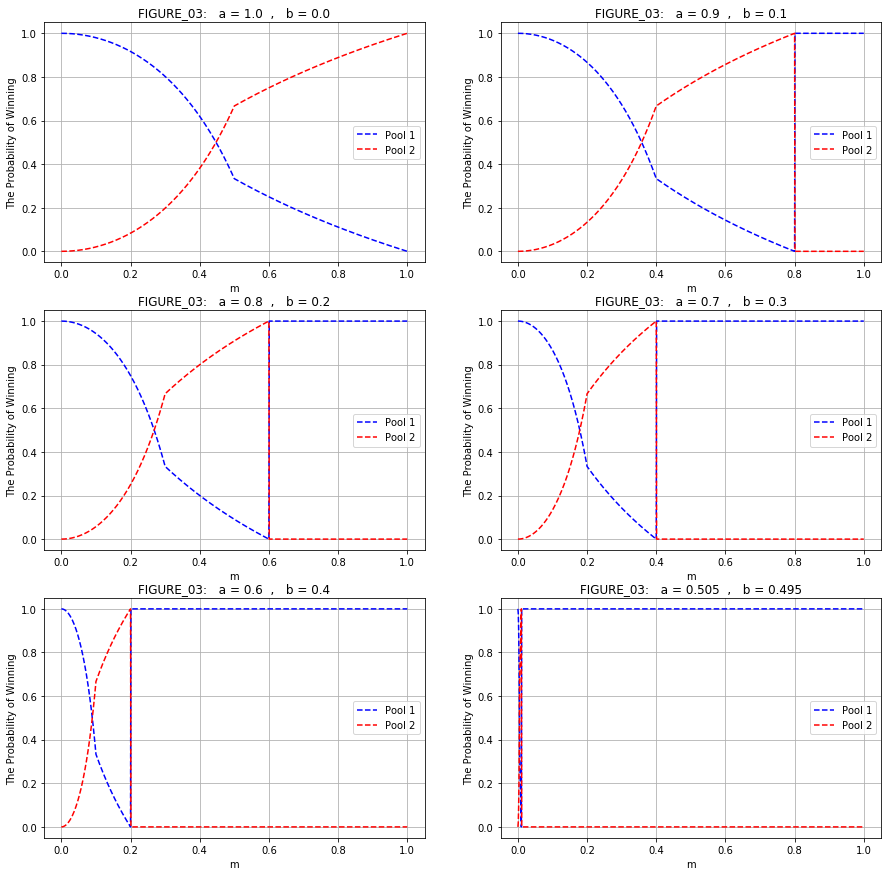

In [13]:
FIGURE_03(aa, bb)

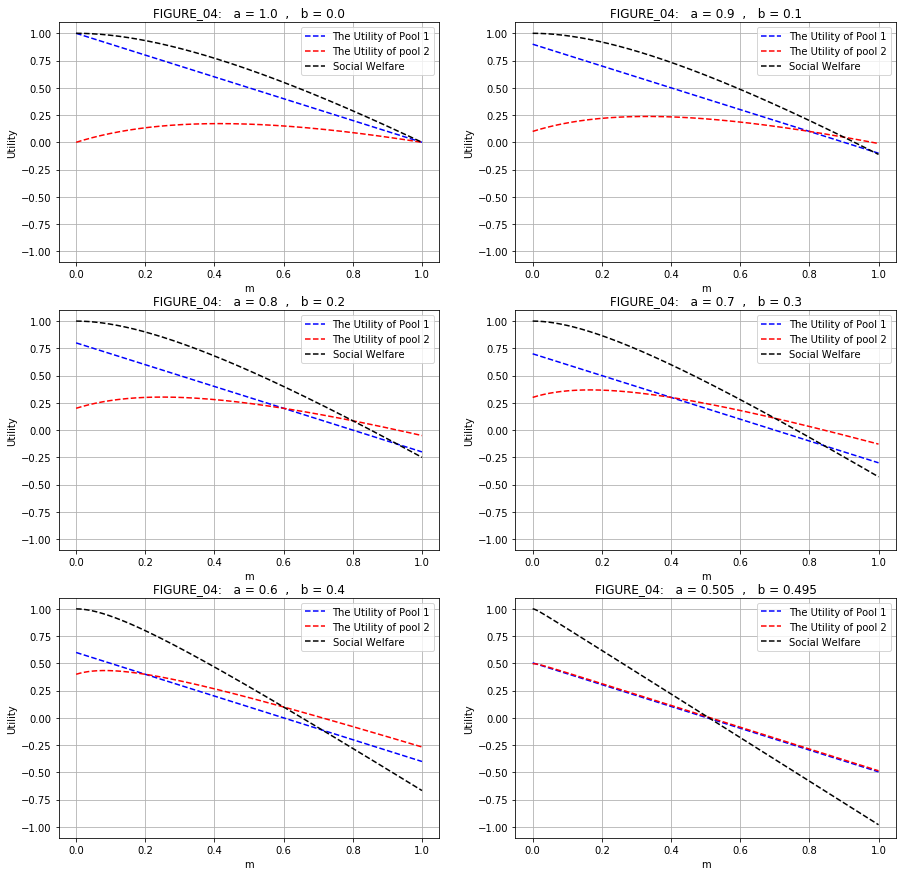

In [14]:
FIGURE_04(aa, bb)

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future

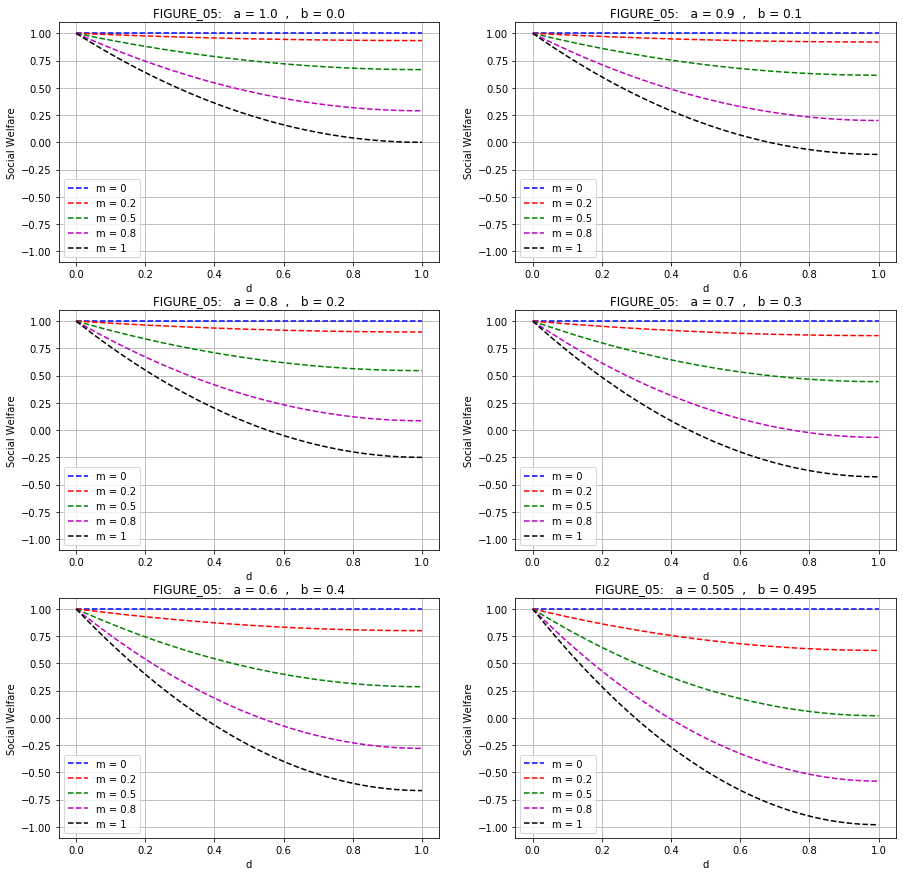

In [15]:
FIGURE_05(aa, bb)

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future

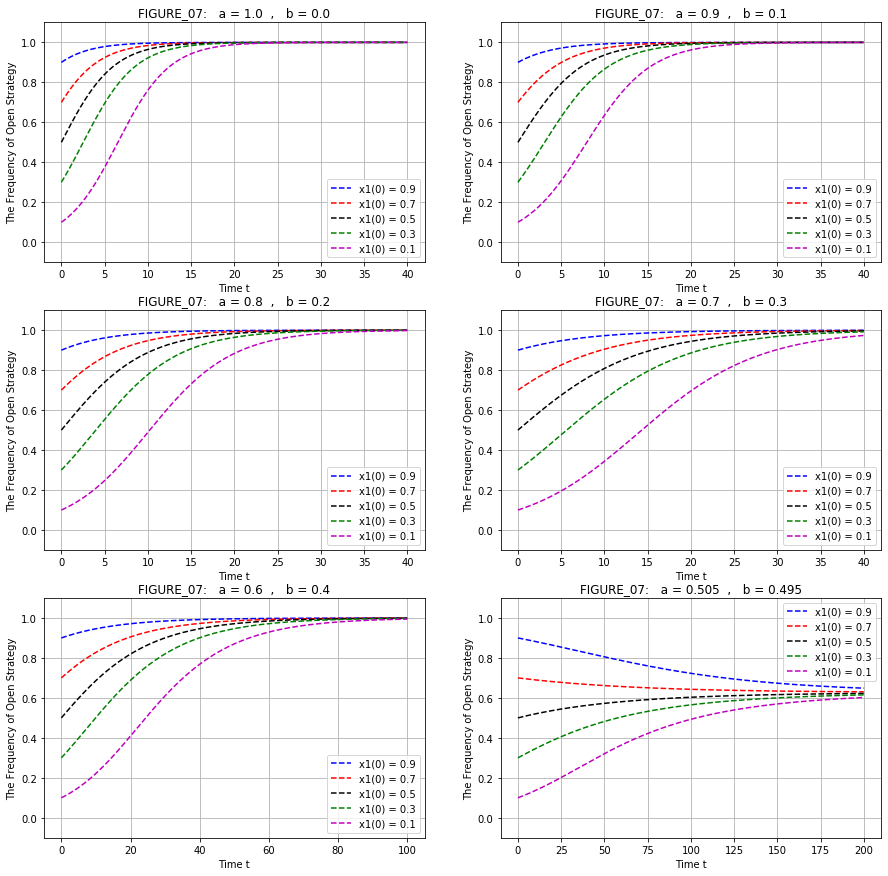

In [16]:
FIGURE_07(aa, bb)

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future

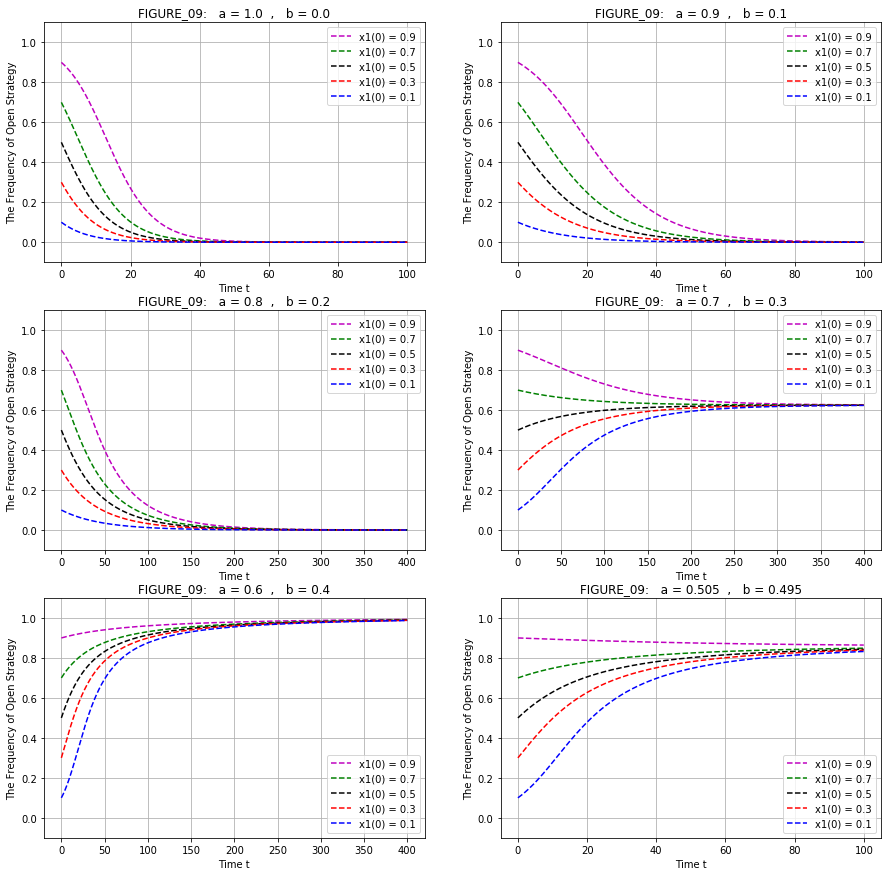

In [17]:
FIGURE_09(aa, bb)

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new in

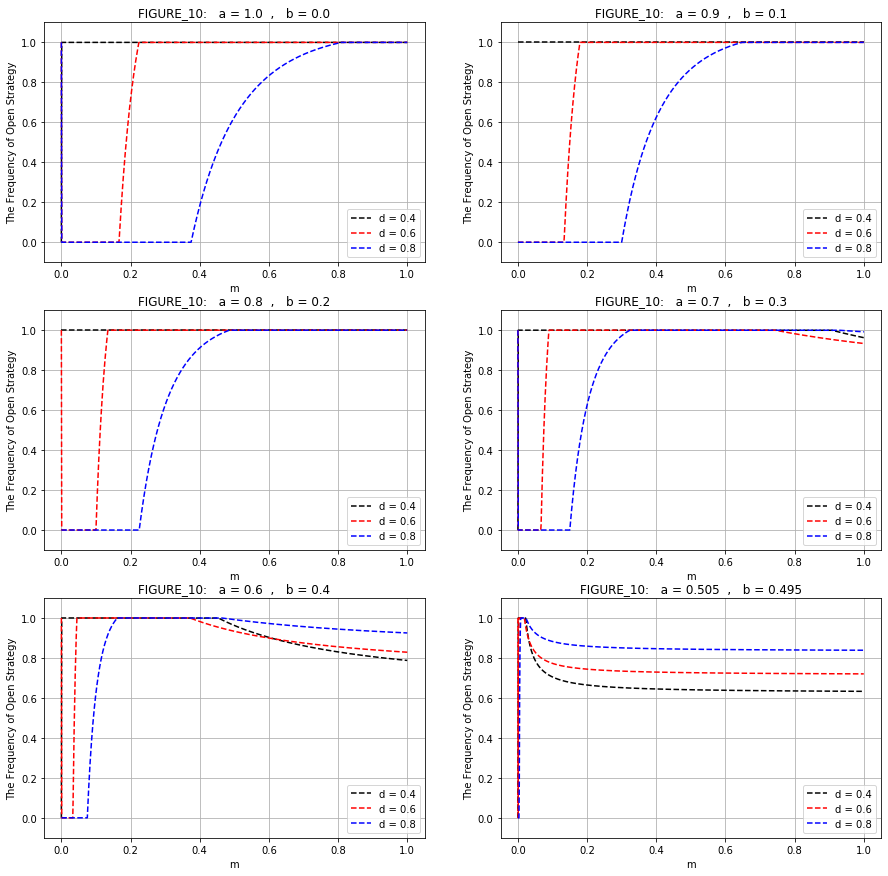

In [18]:
FIGURE_10(aa, bb)

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future

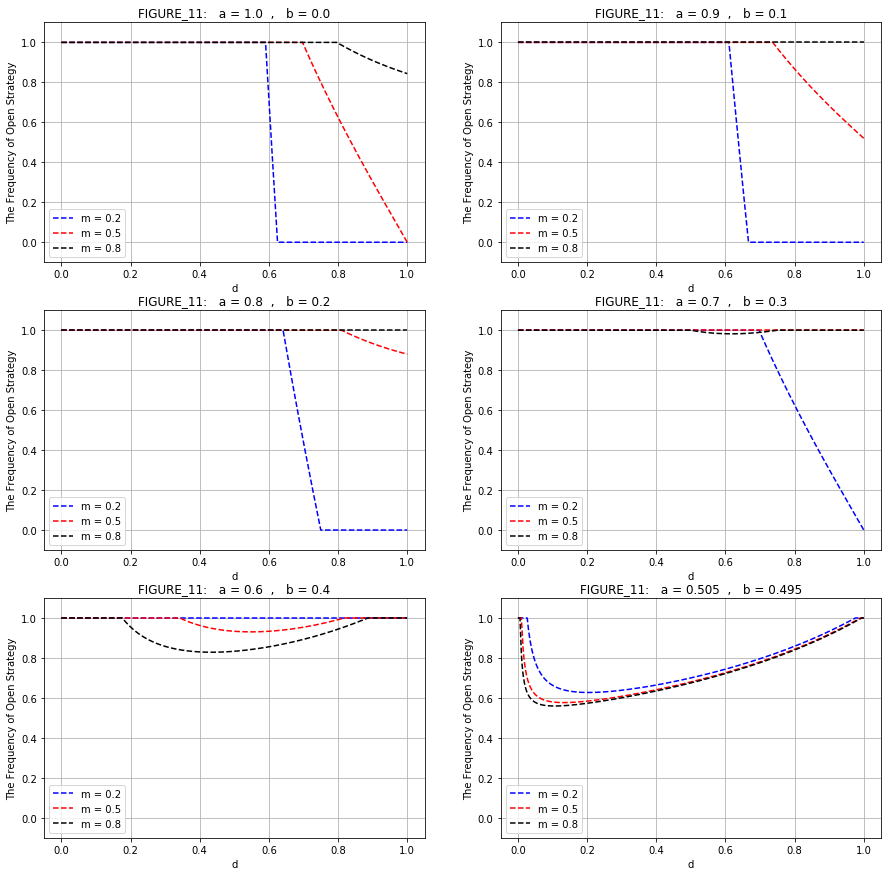

In [19]:
FIGURE_11(aa, bb)

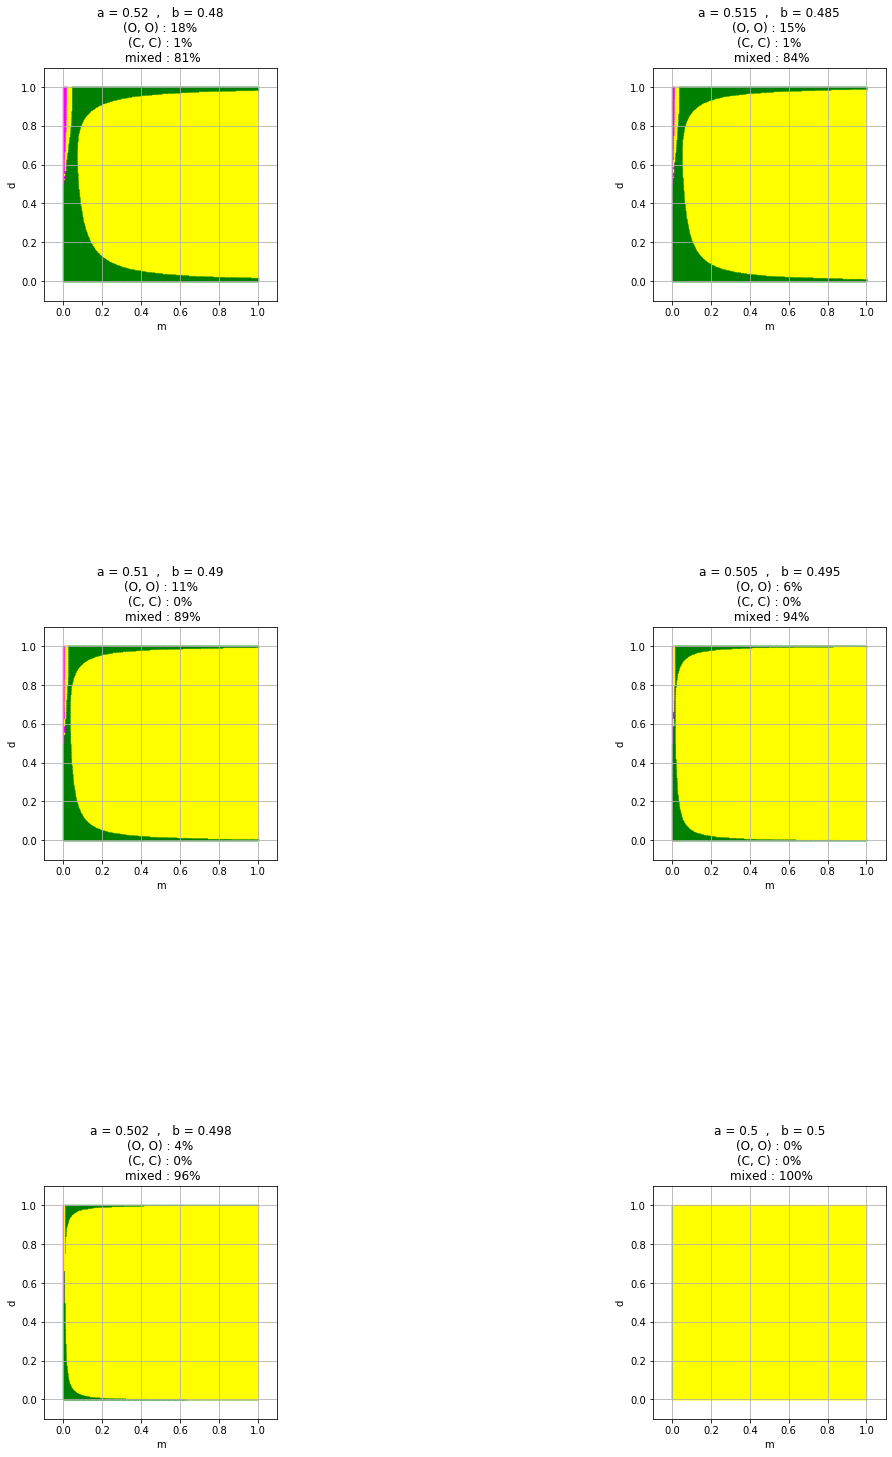

In [7]:
DOMAIN(aa, bb)